In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [9]:
df= pd.read_csv("churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:,-1].values

In [14]:
print(X)
print(y)
print(y.reshape(-1,1))

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [16]:
lr = LabelEncoder()
X[:,2]  = lr.fit_transform(X[:,2])

In [18]:
ct = ColumnTransformer([("zero_one", OneHotEncoder(), [1])], remainder="passthrough")
X = ct.fit_transform(X)

In [20]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [22]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

**Part 2**

In [27]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation="relu"))
ann.add(tf.keras.layers.Dense(units = 6, activation="relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

**PArt 3**

In [28]:
ann.compile(optimizer= "adam", loss ="binary_crossentropy" , metrics = ["accuracy"] )

In [29]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8656
Epoch 66/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8648
Epoch 67/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8652
Epoch 68/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8636
Epoch 69/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8650
Epoch 70/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8658
Epoch 71/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8655
Epoch 72/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8651
Epoch 73/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8661
Epoch 74/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 

**PArt 4**

In [37]:
print(ann.predict( st.transform([ [1, 0, 0 , 600 , 1, 40, 3, 60000, 2, 1, 1, 50000 ] ])))

1/1 [==============================] - 0s 21ms/step
[[0.02221368]]


In [38]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [39]:
res = pd.DataFrame(np.concatenate( (y_test.reshape(len(y_test), 1) , y_pred.reshape(len(y_pred), 1)) ,1), columns = ["actual", "predicted"])

In [40]:
res.sample(5)

,actual,predicted
419,0,1
273,1,1
877,0,0
846,0,0
1624,0,0


<Axes: >

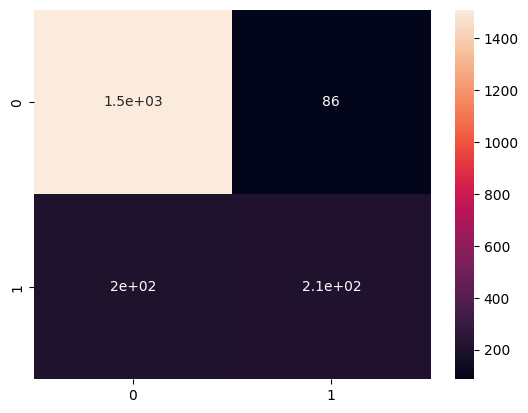

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [42]:
print(accuracy_score(y_test, y_pred))

0.8575
